# Purpose of this Collab
This collab is created in order to test different base models and assess their ability to capture the paterns of cifar-10 dataset. The ultimate goal is to understand how each layer affects the end result, as well as how the different hyperparameters affect the classification metrics and the learning process.
The best hyperparameters and more complex architectures will be implemented in a different collab.

In [ ]:
# Load Data of Dataset Cifar-10
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape

170498071/170498071 [==============================] - 4s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
# Make Useful Imports
from keras.optimizers import Adam,SGD
from keras import layers
from keras.models import Sequential
from keras.regularizers import L2,L1
!pip install visualkeras
import visualkeras
import time
from sklearn.metrics import precision_recall_curve, auc
from keras import metrics
import keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 6.4 MB/s eta 0:00:00


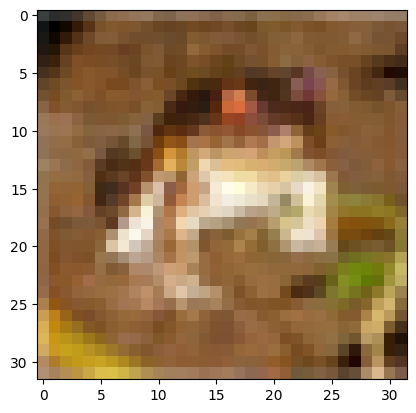

In [ ]:
# Visualize the first image
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [ ]:
import keras
# Preprocess target labels for our neural networks by performing one hot encoding
def preprocess_labels(y_train,y_test,number_of_classes):
  # one hot encode target values
  y_train = keras.utils.to_categorical(y_train,num_classes=number_of_classes)
  y_test = keras.utils.to_categorical(y_test,num_classes=number_of_classes)
  return y_train,y_test

y_train,y_test = preprocess_labels(y_train,y_test,10)
print("Shape of one-hot-encoded y_train: ",y_train.shape)

Shape of one-hot-encoded y_train:  (50000, 10)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

In [ ]:
def model_plots(history,model_name):

  # Set a larger width for the plots
  figsize = (15, 6)

  # Create the figure with the specified figsize
  plt.figure(figsize=figsize)

  # Plotting loss
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label='Training Loss')
  plt.plot(history.history['val_loss'], label='Validation Loss')
  plt.title(model_name + '  Learning Curve')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Plotting accuracy
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label='Training Accuracy')
  plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
  plt.title(model_name + ' Accuracy Learning Curve')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.tight_layout()
  plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import numpy as np
# Function to calculate and print different classification metrics for comparison of our models
def evaluate_classification_metrics(y_true, y_pred,verbose=True):
    # Transforming the labels back to Label Encoding so that the functions of
    # scikit-learn can process them
    y_true = np.argmax(y_true, axis=1)
    y_pred = np.argmax(y_pred, axis=1)
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)

    # Calculate precision, recall, and F1-score for all unique labels
    precision = precision_score(y_true, y_pred,zero_division=0, average='weighted')
    recall = recall_score(y_true, y_pred,zero_division=0, average='weighted')
    f1 = f1_score(y_true, y_pred,zero_division=0,average='weighted')

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Generate a classification report
    class_report = classification_report(y_true, y_pred, zero_division=0)
    if verbose:
      print(f'\tAccuracy: {accuracy}')
      print(f'\tPrecision Weighted: {precision}')
      print(f'\tRecall Weighted: {recall}')
      print(f'\tF1-Score Weighted: {f1}')

    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf_matrix,
        "Classification Report": class_report
    }

Epoch 1/10
1250/1250 [==============================] - 7s 5ms/step - loss: 2.1198 - accuracy: 0.2354 - val_loss: 2.0159 - val_accuracy: 0.2739
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.9681 - accuracy: 0.3086 - val_loss: 1.9364 - val_accuracy: 0.3226
Epoch 3/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9151 - accuracy: 0.3325 - val_loss: 1.8979 - val_accuracy: 0.3391
Epoch 4/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8844 - accuracy: 0.3458 - val_loss: 1.8731 - val_accuracy: 0.3487
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8635 - accuracy: 0.3541 - val_loss: 1.8568 - val_accuracy: 0.3537
Epoch 6/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.8484 - accuracy: 0.3605 - val_loss: 1.8454 - val_accuracy: 0.3552
Epoch 7/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.8360 - accuracy: 0.3646 - val_loss: 1.8329 - val_accuracy:

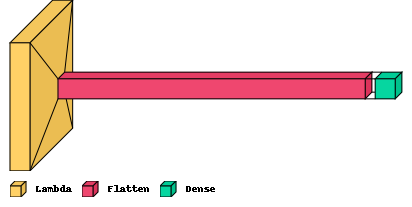

In [ ]:
# Base Model (Model 1)
opt_1 = SGD(learning_rate=0.001) # stochastic gradient descent optimizer

# Model with only a Flatten and a Dense Layer
model_1 = Sequential([layers.Input((32, 32,3)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(10, activation='softmax')])

model_1.compile(optimizer=opt_1, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_1 = model_1.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=10)

# Record end time
end_time = time.time()

# Calculate training time
training_time1 = end_time - start_time

print(model_1.summary())
visualkeras.layered_view(model_1,legend=True)

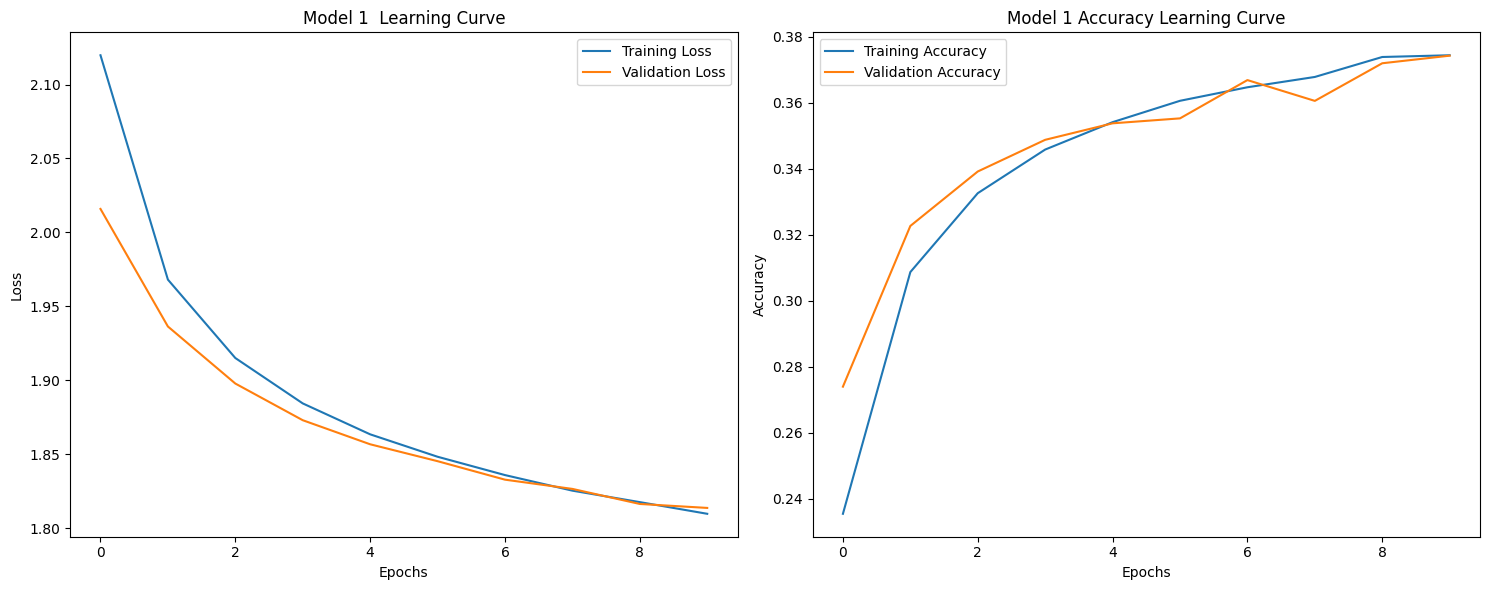

Training Time (seconds): 83.70261001586914
Extra Metrics on Validation Set:
	Accuracy: 0.3703
	Precision Weighted: 0.3722865831265643
	Recall Weighted: 0.3703
	F1-Score Weighted: 0.3640337859198375


In [ ]:
# Create the Training and Validation Plot for the trained model
model_plots(history_1,'Model 1')
# Print the training time of the model
print('Training Time (seconds):', training_time1)
# Print extra classification metrics based on the customly created function
print('Extra Metrics on Validation Set:')
predictions = model_1.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

The models seems to increase training and validation accuracy and decrease the corresponding losses per epoch. So, I will try more epochs to see if this behavior continues, and if the model continues to learn.

In [ ]:
# Record start time
start_time = time.time()
history_1_more_epochs = model_1.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=50)
# Record end time
end_time = time.time()

# Calculate training time
training_time1_more_epochs = end_time - start_time
print('Training time is now:',training_time1_more_epochs)

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7874 - accuracy: 0.3855 - val_loss: 1.7902 - val_accuracy: 0.3852
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7818 - accuracy: 0.3865 - val_loss: 1.7884 - val_accuracy: 0.3812
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7771 - accuracy: 0.3903 - val_loss: 1.7849 - val_accuracy: 0.3859
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7728 - accuracy: 0.3915 - val_loss: 1.7817 - val_accuracy: 0.3806
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7688 - accuracy: 0.3926 - val_loss: 1.7864 - val_accuracy: 0.3768
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7653 - accuracy: 0.3951 - val_loss: 1.7791 - val_accuracy: 0.3873
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.7616 - accuracy: 0.3947 - val_loss: 1.7716 - val_accur

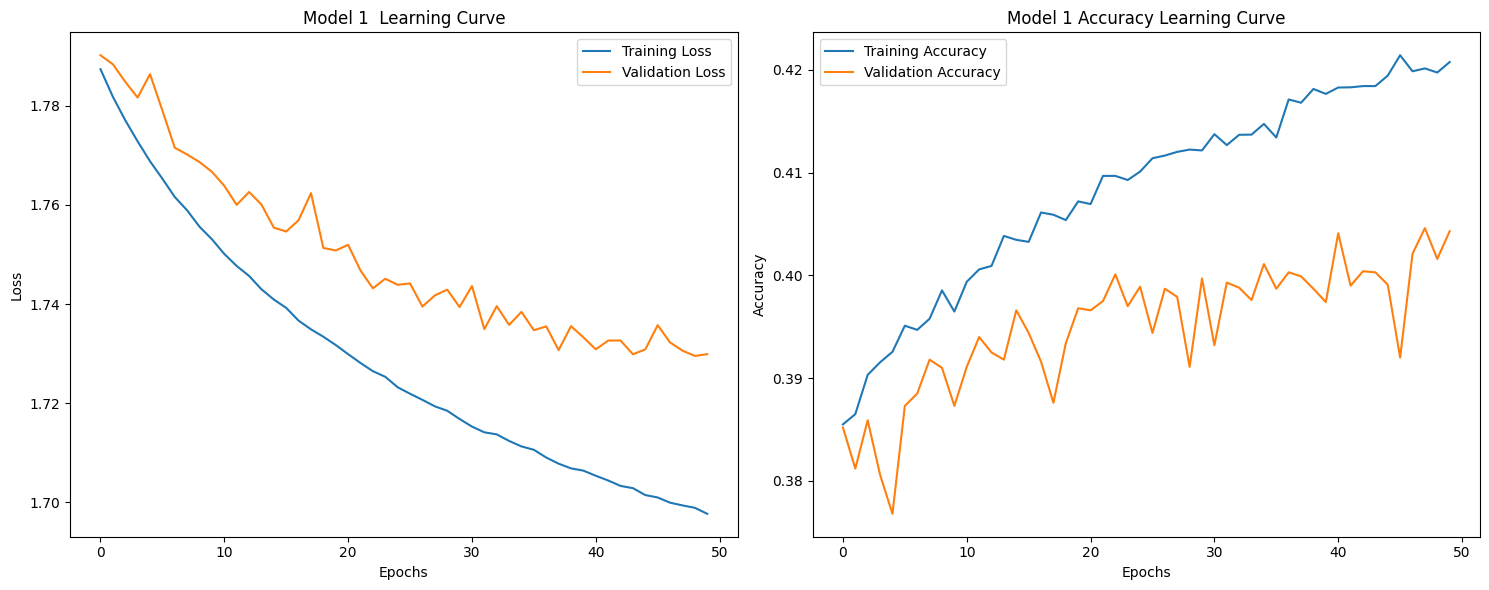

The difference in training time with the Original Model is: 204.34685683250427
Extra Metrics on Validation Set:
	Accuracy: 0.4043
	Precision Weighted: 0.40645026237873166
	Recall Weighted: 0.4043
	F1-Score Weighted: 0.40179390377264634


In [ ]:
model_plots(history_1_more_epochs,'Model 1')
print('The difference in training time with the Original Model is:',(training_time1_more_epochs - training_time1))
print('Extra Metrics on Validation Set:')
predictions = model_1.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

The graphs show that our model stops increasing its performance and possibly begins to overfit after some epochs. Even though the training accuracy increases, the validation set accuracy does not do the same meaning that our simple model begins to learn the noise of the training data.
Now, I am going to examine how the learning rate will affect the learning in this first simple base model.

In [ ]:
# Base Model (Model 1) with bigger learning rate
opt_1 = SGD(learning_rate=0.1) # stochastic gradient descent optimizer

model_1.compile(optimizer=opt_1, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_1_learning_rate = model_1.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=10)

# Record end time
end_time = time.time()

# Calculate training time
training_time1_learning_rate = end_time - start_time

print('Training Time (seconds):', training_time1_learning_rate)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 11.7203 - accuracy: 0.2278 - val_loss: 10.3805 - val_accuracy: 0.2120
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 10.4007 - accuracy: 0.2514 - val_loss: 11.5007 - val_accuracy: 0.2019
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 10.1178 - accuracy: 0.2581 - val_loss: 14.3369 - val_accuracy: 0.2067
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 10.1247 - accuracy: 0.2601 - val_loss: 13.1233 - val_accuracy: 0.1900
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 9.7830 - accuracy: 0.2676 - val_loss: 19.3472 - val_accuracy: 0.1285
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 9.8132 - accuracy: 0.2692 - val_loss: 12.8123 - val_accuracy: 0.1969
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 9.4421 - accuracy: 0.2735 - val_loss: 8.2708 - val

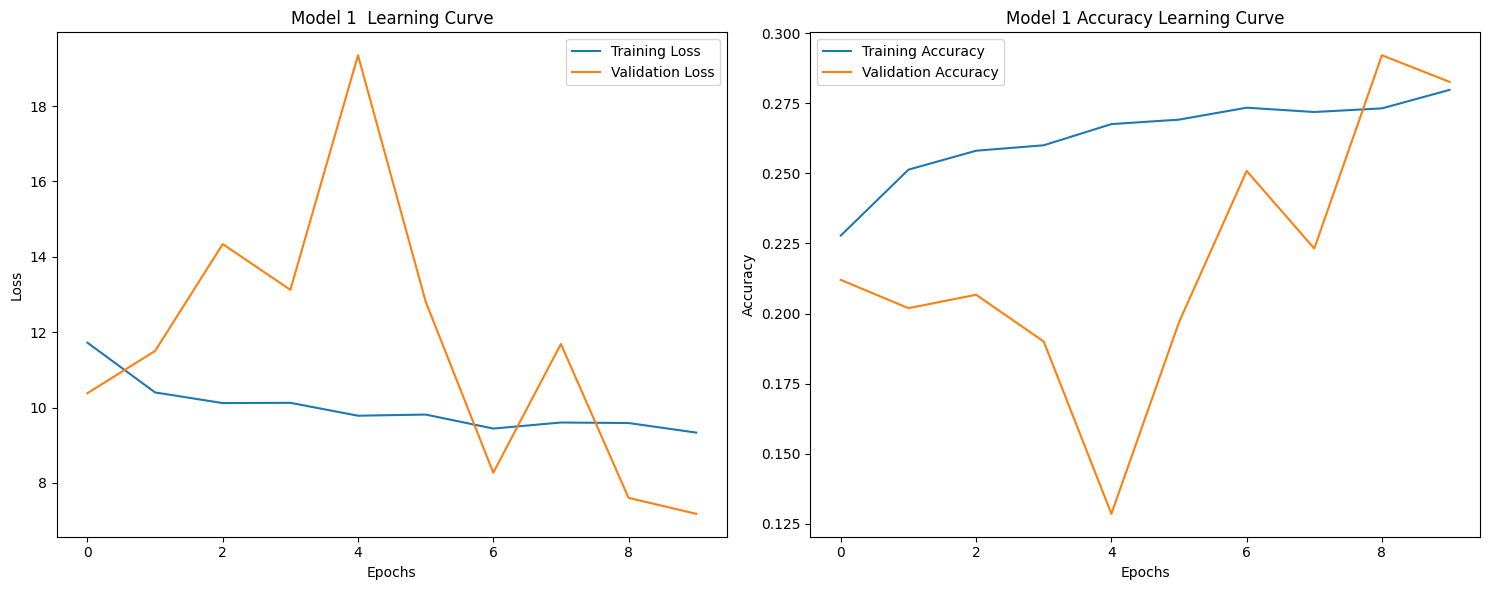

The difference in training time with the Original Base Model is: 8.959814548492432
Extra Metrics on Validation Set:
	Accuracy: 0.2827
	Precision Weighted: 0.4455947701367387
	Recall Weighted: 0.2827
	F1-Score Weighted: 0.22207433063030238


In [ ]:
model_plots(history_1_learning_rate,'Model 1')
print('The difference in training time with the Original Base Model is:',(training_time1_learning_rate - training_time1))
print('Extra Metrics on Validation Set:')
predictions = model_1.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

Increasing the Learning rate by a factor of 100 (from 0.001 to 0.1) resulted in a non so smooth learning curve, as the training accuracy and loss do not seem to have a monotonous increase or decrease. The resulted graphs have a rather not so usual form, and seems that the learning is not performed ideally.
Note that the increasing in the learning rate led to a decrease in training time. Lastly, I want to check if the Lambda layer, which is used for normalizing the pixel values have an affect in the learning process of this model.

In [ ]:
# Base Model (Model 1) but removing the Lamda Layer
opt_1 = SGD(learning_rate=0.001) # stochastic gradient descent optimizer

# Model with only a Flatten and a Dense Layer
model_1_no_normalization = Sequential([layers.Input((32, 32,3)),
                     layers.Flatten(),
                     layers.Dense(10, activation='softmax')])

model_1_no_normalization.compile(optimizer=opt_1, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_1_no_normalization = model_1_no_normalization.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=10)

# Record end time
end_time = time.time()

# Calculate training time
training_time1_no_normalization = end_time - start_time

print('Training Time (seconds):', training_time1_no_normalization )

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 8510.5879 - accuracy: 0.2124 - val_loss: 11157.6514 - val_accuracy: 0.1723
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 7314.4082 - accuracy: 0.2386 - val_loss: 5703.7490 - val_accuracy: 0.2337
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 6879.2363 - accuracy: 0.2498 - val_loss: 8143.7734 - val_accuracy: 0.2470
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 6844.0039 - accuracy: 0.2540 - val_loss: 6768.4521 - val_accuracy: 0.2465
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 6819.0117 - accuracy: 0.2592 - val_loss: 7591.1504 - val_accuracy: 0.2478
Epoch 6/10
1563/1563 [==============================] - 4s 3ms/step - loss: 6667.4268 - accuracy: 0.2625 - val_loss: 3915.9504 - val_accuracy: 0.2905
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 6766.3667 - accuracy: 0

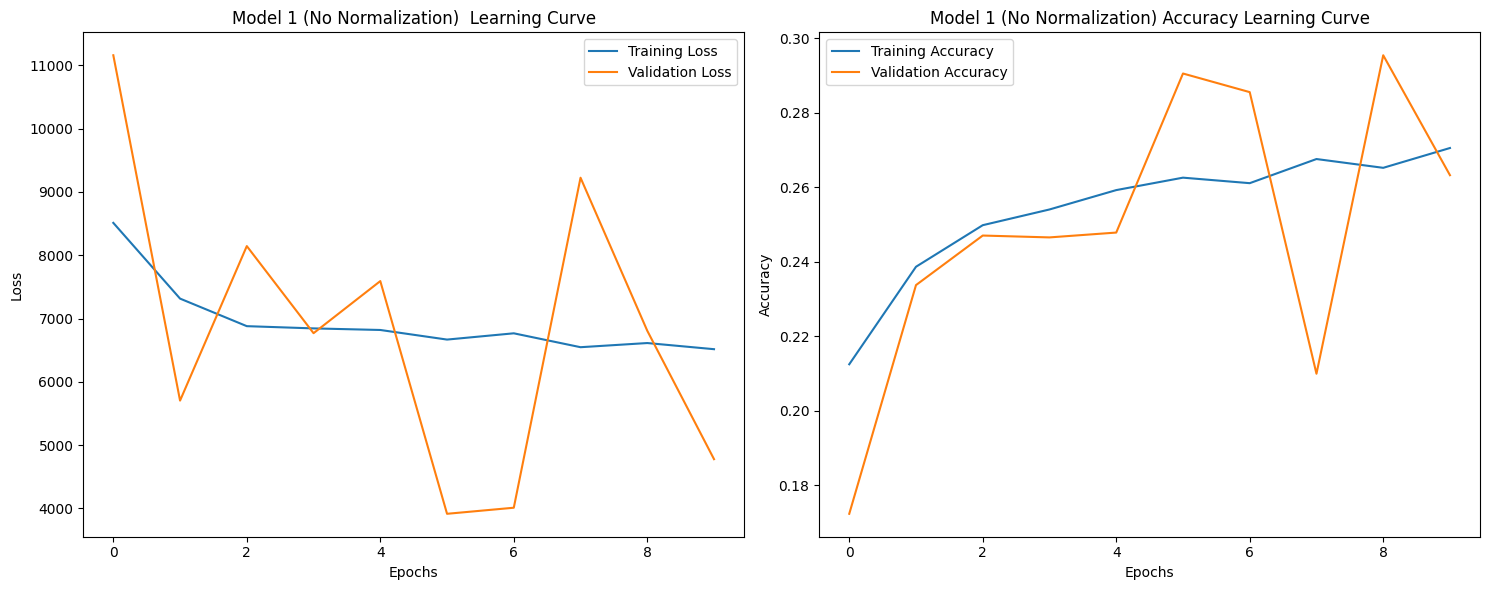

The difference in training time with the Original Base Model is: -22.123574018478394
Extra Metrics on Validation Set:
	Accuracy: 0.2632
	Precision Weighted: 0.4818242828700495
	Recall Weighted: 0.2632
	F1-Score Weighted: 0.23707017058917754


In [ ]:
model_plots(history_1_no_normalization,'Model 1 (No Normalization)')
print('The difference in training time with the Original Base Model is:',(training_time1_no_normalization - training_time1))
print('Extra Metrics on Validation Set:')
predictions = model_1_no_normalization.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

The results show that Normalization and thus the Lambda layer have affected the learning process. We can observe that by remove that layer the final validation and training accuracies is lower. At the same time, there is no monotonous learning curve. The losses have a different scale and thus a direct numerical comparison is not applicable. I will now use a more complex optimizer, Adam Optimizer. This optimizer is an extension of stochastic gradient descent (SGD) that incorporates ideas from both momentum optimization and RMSprop (Root Mean Square Propagation). In addition to the above, Adam Optimizer also uses Adaptive Learning Rates, which as we saw can affect the performance of a neural network.

In [ ]:
# Base Model with a more complex Optimizer
opt_1 = Adam(learning_rate=0.001) # Adam Optimizer

# Model with only a Flatten and a Dense Layer
model_1_adam = Sequential([layers.Input((32, 32,3)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(10, activation='softmax')])

model_1_adam.compile(optimizer=opt_1, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_1_adam = model_1_adam.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=10)

# Record end time
end_time = time.time()

# Calculate training time
training_time1_adam = end_time - start_time

print('Training Time (seconds):', training_time1_adam)

Epoch 1/10
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9655 - accuracy: 0.3140 - val_loss: 1.8853 - val_accuracy: 0.3462
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8836 - accuracy: 0.3500 - val_loss: 1.9042 - val_accuracy: 0.3322
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8500 - accuracy: 0.3646 - val_loss: 1.8103 - val_accuracy: 0.3574
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8518 - accuracy: 0.3659 - val_loss: 1.7736 - val_accuracy: 0.3841
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8276 - accuracy: 0.3770 - val_loss: 1.8623 - val_accuracy: 0.3594
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8257 - accuracy: 0.3762 - val_loss: 1.8470 - val_accuracy: 0.3610
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8241 - accuracy: 0.3784 - val_loss: 2.0202 - val_accuracy:

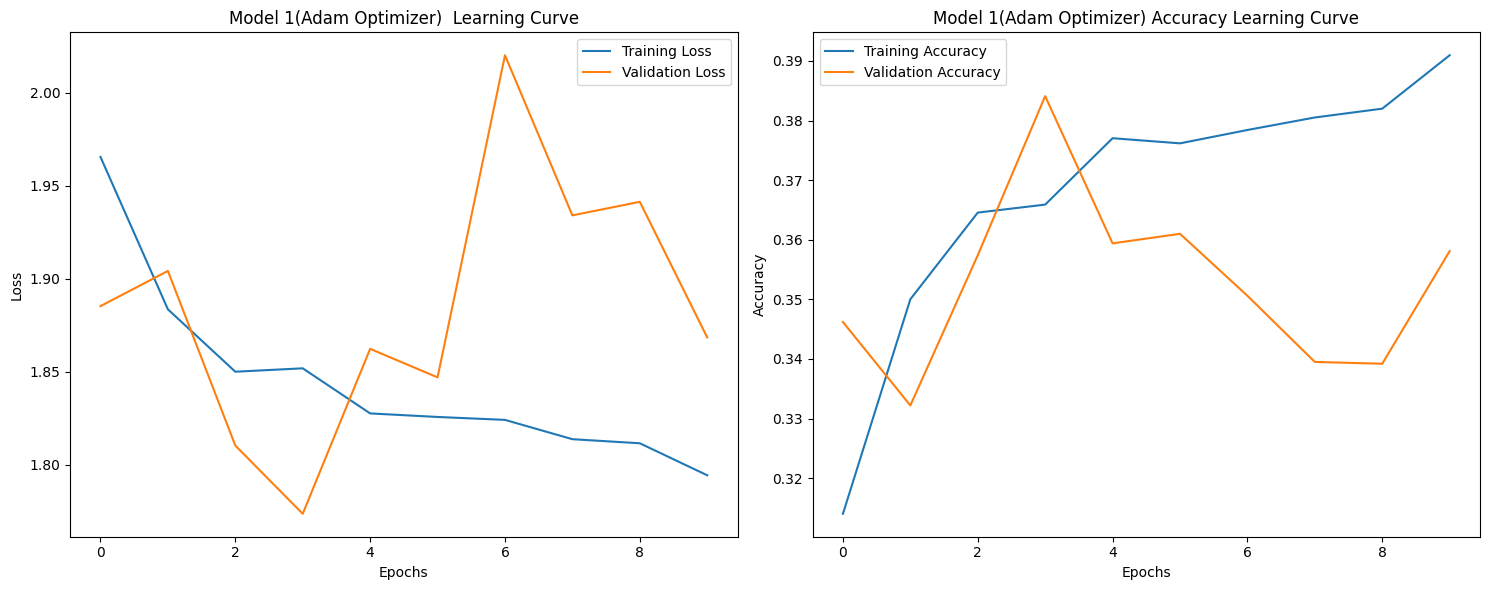

The difference in training time with the Original Base Model is: 9.030477285385132
Extra Metrics on Validation Set:
	Accuracy: 0.3581
	Precision Weighted: 0.42504097072994584
	Recall Weighted: 0.3581
	F1-Score Weighted: 0.3255327331577939


In [ ]:
model_plots(history_1_adam,'Model 1(Adam Optimizer)')
print('The difference in training time with the Original Base Model is:',(training_time1_adam - training_time1))
print('Extra Metrics on Validation Set:')
predictions = model_1_adam.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

Adam optimizer seems to have altered the learning process. The accuracy curve and the losses curve on the validation set is not monotonous but rather has a more complicated non-canonical form.

Now, I will try to understand how adding components will help the model understand the patterns of the data. In a different collab, I will perform a fine-tuning and Grid Search into the optimal Architecture and Hyperparameters.

Epoch 1/10
1250/1250 [==============================] - 6s 4ms/step - loss: 2.1716 - accuracy: 0.2030 - val_loss: 2.0774 - val_accuracy: 0.2616
Epoch 2/10
1250/1250 [==============================] - 4s 4ms/step - loss: 2.0196 - accuracy: 0.2694 - val_loss: 1.9911 - val_accuracy: 0.2913
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9563 - accuracy: 0.3016 - val_loss: 1.9412 - val_accuracy: 0.3072
Epoch 4/10
1250/1250 [==============================] - 6s 5ms/step - loss: 1.9139 - accuracy: 0.3256 - val_loss: 1.9064 - val_accuracy: 0.3324
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.8841 - accuracy: 0.3393 - val_loss: 1.8783 - val_accuracy: 0.3444
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8591 - accuracy: 0.3516 - val_loss: 1.8606 - val_accuracy: 0.3463
Epoch 7/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8384 - accuracy: 0.3601 - val_loss: 1.8428 - val_accuracy:

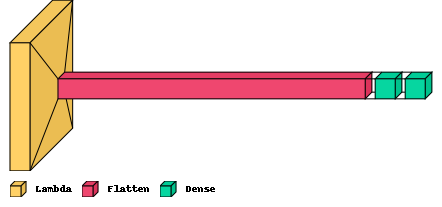

In [ ]:
# Adding number of parameters to the Base Model 1 (Model 2)

opt_2 = SGD(learning_rate=0.001)

model_2 = Sequential([layers.Input((32, 32,3)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(32, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_2.compile(optimizer=opt_2, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_2 = model_2.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=10)

# Record end time
end_time = time.time()

# Calculate training time
training_time2 = end_time - start_time

print(model_2.summary())
visualkeras.layered_view(model_2,legend=True)

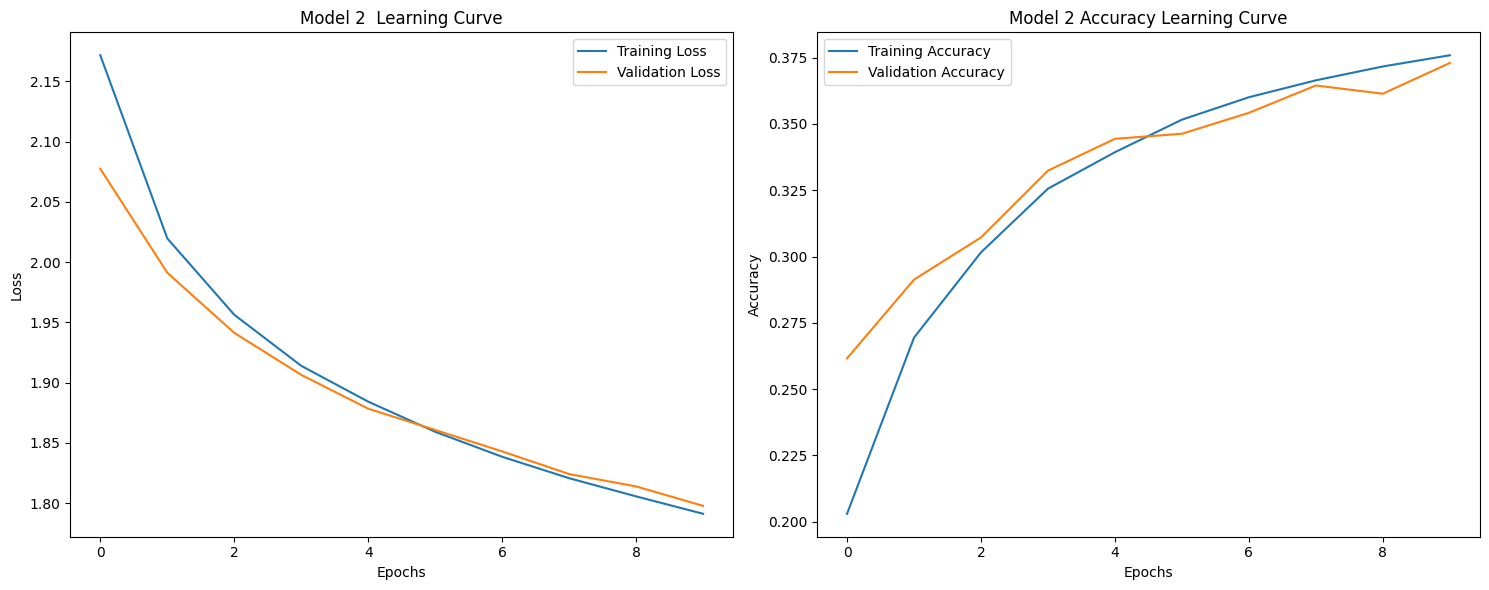

Training Time: 83.68218541145325
The difference in training time with the Original Base Model is: -0.020424604415893555
Extra Metrics on Validation Set:
	Accuracy: 0.3739
	Precision Weighted: 0.36412311941922626
	Recall Weighted: 0.3739
	F1-Score Weighted: 0.363942729668665


In [ ]:
model_plots(history_2,'Model 2')
print('Training Time:', training_time2)
print('The difference in training time with the Original Base Model is:',(training_time2 - training_time1))
print('Extra Metrics on Validation Set:')
predictions = model_2.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

We can see that the model has not increased the performance in comparison to the first (Base) Model. Given the higher number of parameters, we test more epochs.

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7794 - accuracy: 0.3801 - val_loss: 1.7885 - val_accuracy: 0.3781
Epoch 2/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7674 - accuracy: 0.3849 - val_loss: 1.7786 - val_accuracy: 0.3800
Epoch 3/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7578 - accuracy: 0.3884 - val_loss: 1.7688 - val_accuracy: 0.3821
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7484 - accuracy: 0.3917 - val_loss: 1.7594 - val_accuracy: 0.3843
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7400 - accuracy: 0.3941 - val_loss: 1.7492 - val_accuracy: 0.3892
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7321 - accuracy: 0.3961 - val_loss: 1.7450 - val_accuracy: 0.3893
Epoch 7/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7245 - accuracy: 0.3982 - val_loss: 1.7352 - val_accuracy:

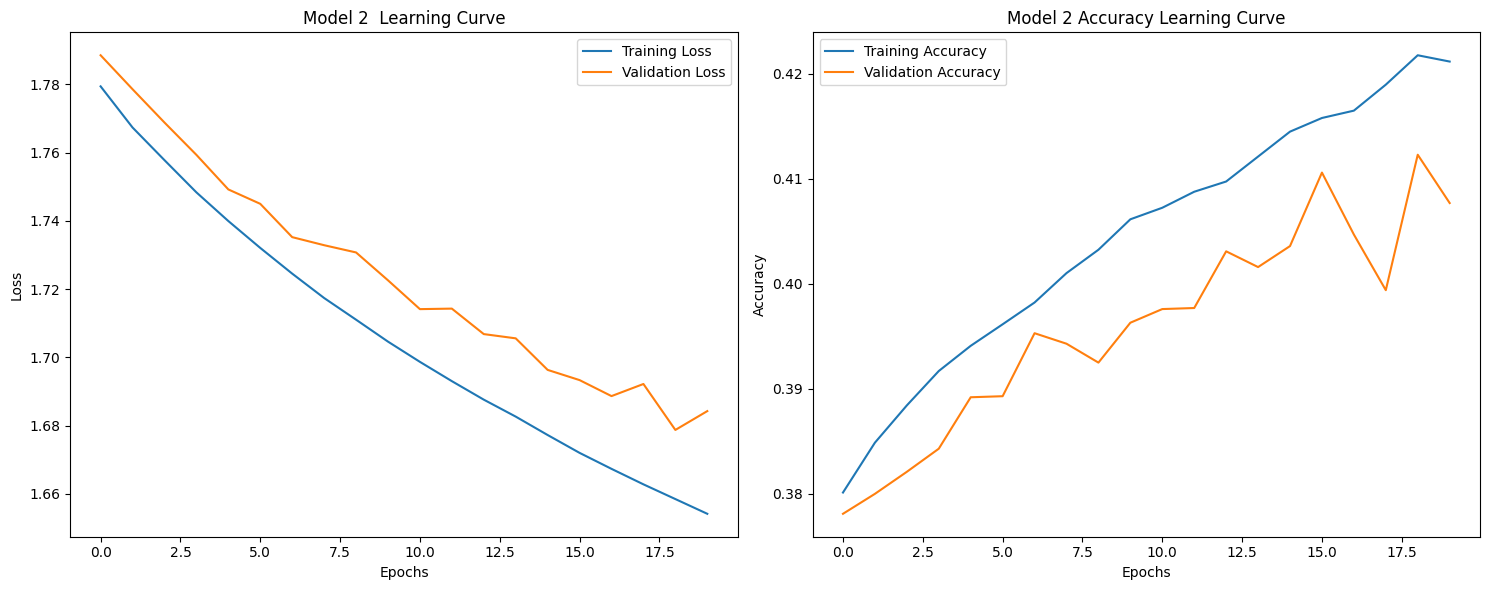

Extra Metrics on Validation Set:
	Accuracy: 0.4129
	Precision Weighted: 0.4122644618122441
	Recall Weighted: 0.4129
	F1-Score Weighted: 0.40224975573331767


In [ ]:
history_2_more_epochs = model_2.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=20)
model_plots(history_2_more_epochs,'Model 2')
print('Extra Metrics on Validation Set:')
predictions = model_2.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

We can observe that the higher number of epochs was beneficial for our model. The performance was increased in comparison to the first base model. However, the number of parameters added to the extra layer should be examined. To do so, another model with the same architecture but different parameters in the new layer is added.

In [ ]:
# Reducing number of parameters to the Model 2, by altering the parameters of the Dense Layer added.

opt_2 = SGD(learning_rate=0.001)

model_2_more_parameters = Sequential([layers.Input((32, 32, 3)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(10, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_2_more_parameters.compile(optimizer=opt_2, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_2_more_parameters = model_2_more_parameters.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=20)

# Record end time
end_time = time.time()

# Calculate training time
training_time2_more_parameters = end_time - start_time

print('Training Time:', training_time2_more_parameters)

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.2365 - accuracy: 0.1456 - val_loss: 2.1901 - val_accuracy: 0.1611
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.1471 - accuracy: 0.1914 - val_loss: 2.1131 - val_accuracy: 0.2168
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0661 - accuracy: 0.2462 - val_loss: 2.0364 - val_accuracy: 0.2493
Epoch 4/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.9990 - accuracy: 0.2711 - val_loss: 1.9793 - val_accuracy: 0.2828
Epoch 5/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.9534 - accuracy: 0.2985 - val_loss: 1.9440 - val_accuracy: 0.3039
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9246 - accuracy: 0.3157 - val_loss: 1.9221 - val_accuracy: 0.3123
Epoch 7/20
1250/1250 [==============================] - 3s 3ms/step - loss: 1.9032 - accuracy: 0.3242 - val_loss: 1.9039 - val_accuracy:

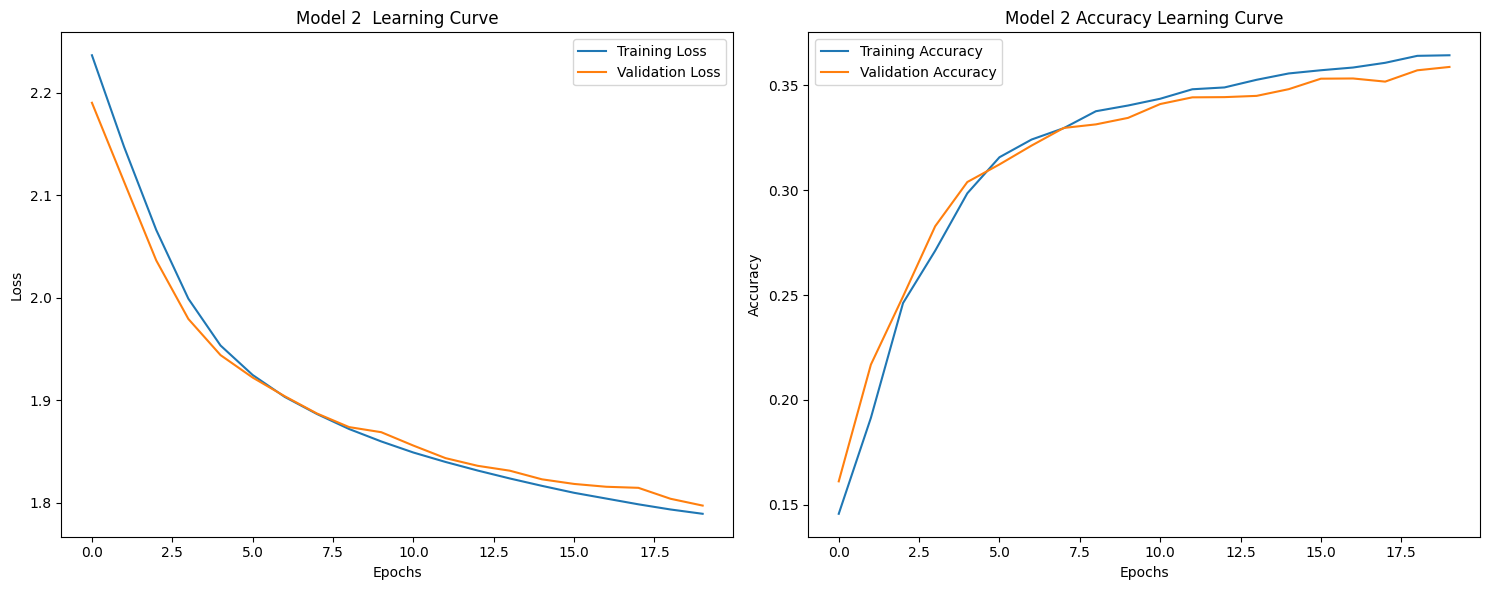

Extra Metrics on Validation Set:
	Accuracy: 0.3614
	Precision Weighted: 0.34387835495692054
	Recall Weighted: 0.3614
	F1-Score Weighted: 0.3443254655866259


In [ ]:
model_plots(history_2_more_parameters,'Model 2')
print('Extra Metrics on Validation Set:')
predictions = model_2_more_parameters.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

In [ ]:
# Reducing the number of parameters to the Model 2, by altering the parameters of the Dense Layer added.
opt_2 = SGD(learning_rate=0.001)

model_2_less_parameters = Sequential([layers.Input((32, 32, 3)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(5, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_2_less_parameters.compile(optimizer=opt_2, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_2_less_parameters = model_2_less_parameters.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=20)

# Record end time
end_time = time.time()

# Calculate training time
training_time2_less_parameters = end_time - start_time

print('Training Time:', training_time2_less_parameters)

Epoch 1/10
1250/1250 [==============================] - 3s 2ms/step - loss: 2.2801 - accuracy: 0.1259 - val_loss: 2.2525 - val_accuracy: 0.1456
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 2.2284 - accuracy: 0.1693 - val_loss: 2.2049 - val_accuracy: 0.1827
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.1726 - accuracy: 0.2128 - val_loss: 2.1524 - val_accuracy: 0.2235
Epoch 4/10
1250/1250 [==============================] - 3s 2ms/step - loss: 2.1262 - accuracy: 0.2404 - val_loss: 2.1119 - val_accuracy: 0.2405
Epoch 5/10
1250/1250 [==============================] - 3s 2ms/step - loss: 2.0887 - accuracy: 0.2489 - val_loss: 2.0800 - val_accuracy: 0.2505
Epoch 6/10
1250/1250 [==============================] - 3s 2ms/step - loss: 2.0574 - accuracy: 0.2620 - val_loss: 2.0509 - val_accuracy: 0.2646
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0305 - accuracy: 0.2702 - val_loss: 2.0284 - val_accuracy:

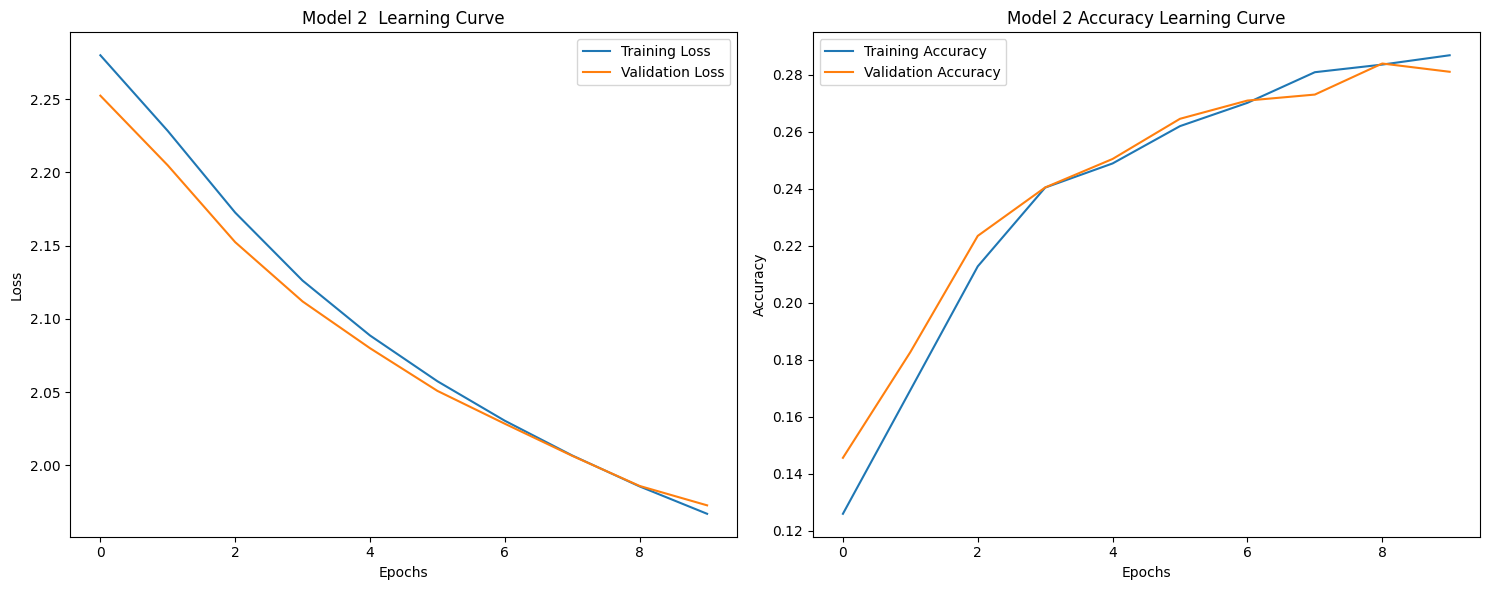

Extra Metrics on Validation Set:
	Accuracy: 0.2827
	Precision Weighted: 0.2629583806205904
	Recall Weighted: 0.2827
	F1-Score Weighted: 0.24519926270593942


In [ ]:
model_plots(history_2_less_parameters,'Model 2')
print('Extra Metrics on Validation Set:')
predictions = model_2_less_parameters.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

In [ ]:
# Adding more parameters to the Middle Dense Layer
opt_2 = SGD(learning_rate=0.001)

model_2_more_parameters = Sequential([layers.Input((32, 32, 3)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(64, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_2_more_parameters.compile(optimizer=opt_2, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_2_more_parameters = model_2_more_parameters.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=20)

# Record end time
end_time = time.time()

# Calculate training time
training_time2_more_parameters = end_time - start_time

print('Training Time:', training_time2_more_parameters)

Epoch 1/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.0931 - accuracy: 0.2416 - val_loss: 2.0020 - val_accuracy: 0.2768
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9482 - accuracy: 0.3110 - val_loss: 1.9244 - val_accuracy: 0.3147
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8879 - accuracy: 0.3385 - val_loss: 1.8775 - val_accuracy: 0.3349
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8509 - accuracy: 0.3540 - val_loss: 1.8459 - val_accuracy: 0.3559
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8240 - accuracy: 0.3640 - val_loss: 1.8210 - val_accuracy: 0.3580
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8016 - accuracy: 0.3717 - val_loss: 1.8014 - val_accuracy: 0.3697
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7826 - accuracy: 0.3803 - val_loss: 1.7877 - val_accuracy:

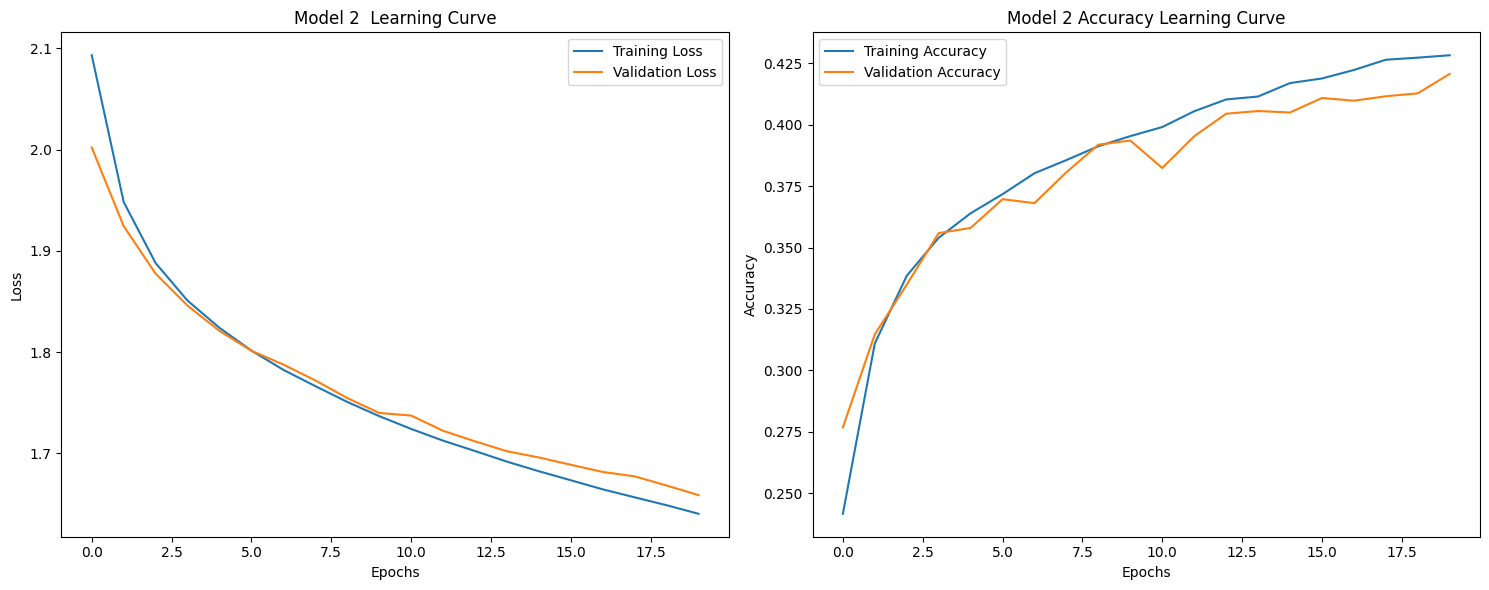

Extra Metrics on Validation Set:
	Accuracy: 0.4221
	Precision Weighted: 0.4296483360438111
	Recall Weighted: 0.4221
	F1-Score Weighted: 0.4166190173009299


In [ ]:
model_plots(history_2_more_parameters,'Model 2')
print('Extra Metrics on Validation Set:')
predictions = model_2_more_parameters.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

The learning curves seem to have a canonical form. However, in the 10 epochs the model seem to have significant smaller validation accuracy and bigger losses. Based on the architecture, this could mean that the model is very simple to capture the relathionships of the given dataset.

In [ ]:
# Altering the Activation Function of the Dense Layer
opt_2 = SGD(learning_rate=0.001)

model_2_different_activation = Sequential([layers.Input((32, 32, 3)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(32, activation='sigmoid'),
                     layers.Dense(10, activation='softmax')])

model_2_different_activation.compile(optimizer=opt_2, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_2_different_activation  = model_2_different_activation.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=20)

# Record end time
end_time = time.time()

# Calculate training time
training_time2_different_activation  = end_time - start_time

print('Training Time:', training_time2_different_activation )

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2999 - accuracy: 0.1150 - val_loss: 2.2553 - val_accuracy: 0.1704
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.2291 - accuracy: 0.1972 - val_loss: 2.2053 - val_accuracy: 0.2075
Epoch 3/20
1250/1250 [==============================] - 3s 3ms/step - loss: 2.1869 - accuracy: 0.2276 - val_loss: 2.1704 - val_accuracy: 0.2371
Epoch 4/20
1250/1250 [==============================] - 3s 3ms/step - loss: 2.1557 - accuracy: 0.2456 - val_loss: 2.1437 - val_accuracy: 0.2478
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.1304 - accuracy: 0.2607 - val_loss: 2.1197 - val_accuracy: 0.2678
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.1086 - accuracy: 0.2710 - val_loss: 2.0998 - val_accuracy: 0.2785
Epoch 7/20
1250/1250 [==============================] - 3s 3ms/step - loss: 2.0894 - accuracy: 0.2826 - val_loss: 2.0824 - val_accuracy:

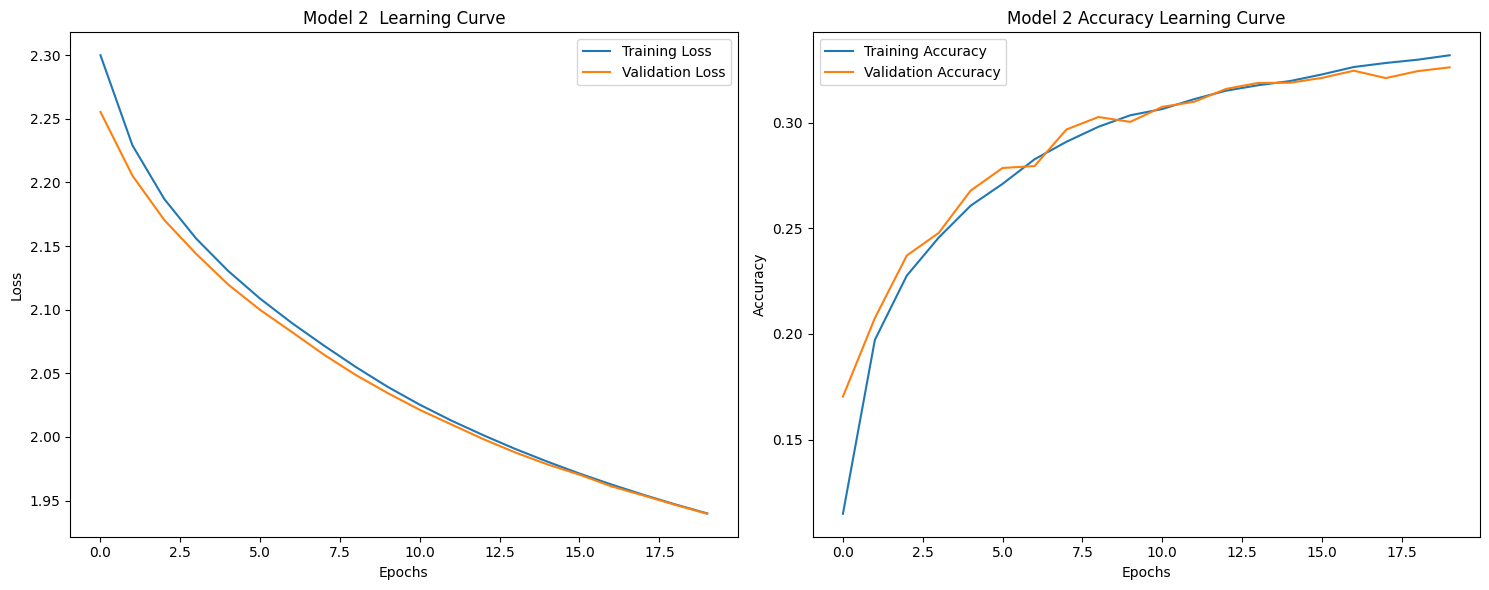

Extra Metrics on Validation Set:
	Accuracy: 0.3238
	Precision Weighted: 0.3165822940662925
	Recall Weighted: 0.3238
	F1-Score Weighted: 0.30606595653316365


In [ ]:
model_plots(history_2_different_activation,'Model 2')
print('Extra Metrics on Validation Set:')
predictions = model_2_different_activation.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

In our first comparison between different activation functions, we can observe that for the same number of epochs, the model with the 'ReLU' activation function seems to achieve better metrics than the 'Sigmoid' activation function.

Epoch 1/20
1250/1250 [==============================] - 6s 4ms/step - loss: 2.1701 - accuracy: 0.2240 - val_loss: 2.0692 - val_accuracy: 0.2637
Epoch 2/20
1250/1250 [==============================] - 7s 5ms/step - loss: 2.0028 - accuracy: 0.2912 - val_loss: 1.9566 - val_accuracy: 0.3067
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9207 - accuracy: 0.3217 - val_loss: 1.9129 - val_accuracy: 0.3148
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8755 - accuracy: 0.3374 - val_loss: 1.8637 - val_accuracy: 0.3323
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8436 - accuracy: 0.3494 - val_loss: 1.8396 - val_accuracy: 0.3456
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8158 - accuracy: 0.3601 - val_loss: 1.8089 - val_accuracy: 0.3597
Epoch 7/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.7923 - accuracy: 0.3677 - val_loss: 1.7892 - val_accuracy:

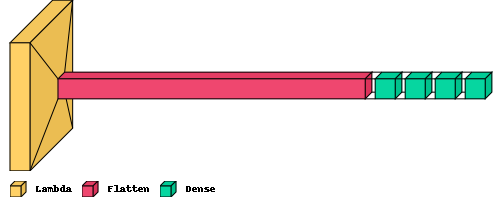

In [ ]:
# Greatly add number of parameters (Model 3)
# Adding more layers and more parameters in each layer

opt_3 = SGD(learning_rate=0.001)

model_3 = Sequential([layers.Input((32, 32, 3)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_3.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_3 = model_3.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=20)


# Record end time
end_time = time.time()

# Calculate training time
training_time3 = end_time - start_time

print(model_3.summary())
visualkeras.layered_view(model_3,legend=True)

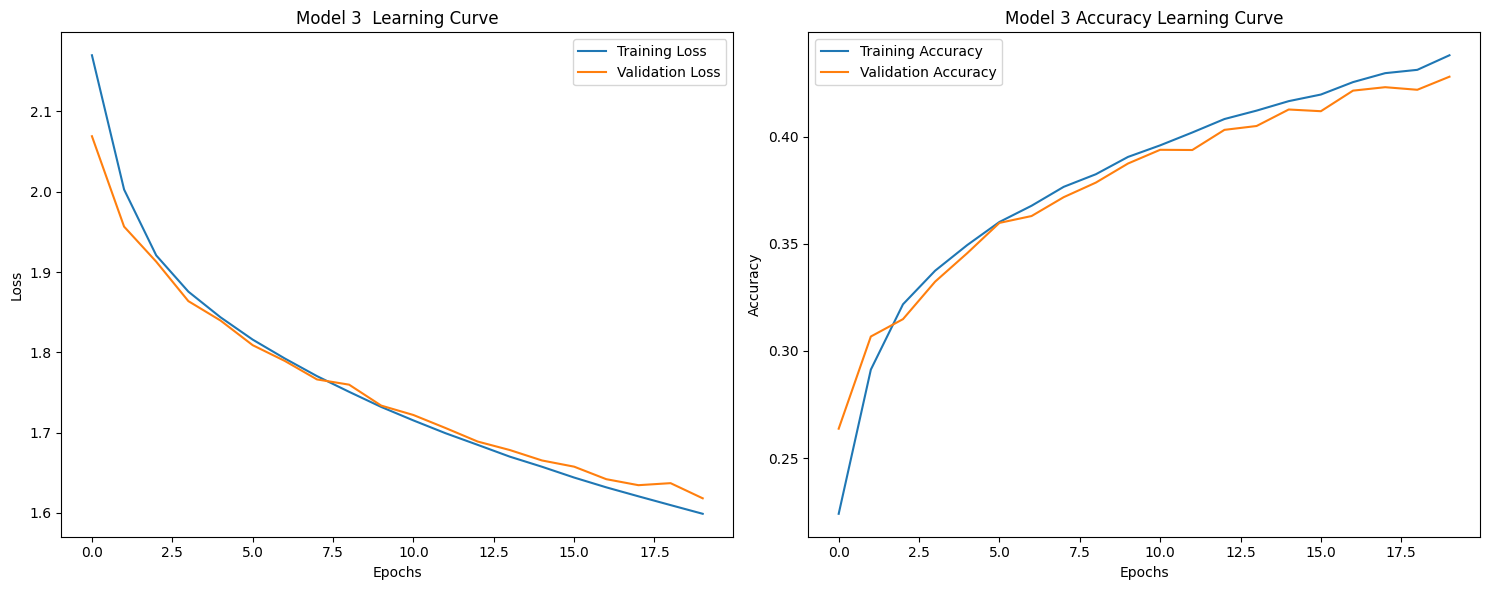

Training Time: 117.961345911026
Extra Metrics on Validation Set:
	Accuracy: 0.4333
	Precision Weighted: 0.43352834823805886
	Recall Weighted: 0.4333
	F1-Score Weighted: 0.42610156990998055


In [ ]:
model_plots(history_3,'Model 3')
print('Training Time:', training_time3)
print('Extra Metrics on Validation Set:')
predictions = model_3.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

Epoch 1/20
1250/1250 [==============================] - 9s 7ms/step - loss: 2.7498 - accuracy: 0.1692 - val_loss: 2.6602 - val_accuracy: 0.2347
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.6027 - accuracy: 0.2368 - val_loss: 2.5151 - val_accuracy: 0.2742
Epoch 3/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.5052 - accuracy: 0.2679 - val_loss: 2.4440 - val_accuracy: 0.2957
Epoch 4/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.4455 - accuracy: 0.2940 - val_loss: 2.3949 - val_accuracy: 0.3155
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 2.4079 - accuracy: 0.3103 - val_loss: 2.3651 - val_accuracy: 0.3281
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.3744 - accuracy: 0.3232 - val_loss: 2.3316 - val_accuracy: 0.3396
Epoch 7/20
1250/1250 [==============================] - 7s 5ms/step - loss: 2.3462 - accuracy: 0.3360 - val_loss: 2.3085 - val_accuracy:

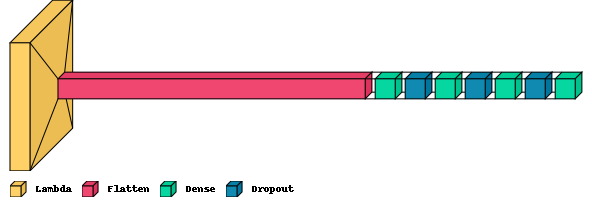

In [ ]:
# Add Regularization & Dropout to reduce overfitting and the parameter values

# Dropout Layer will add some randomness to the created networks,
# by dropping out of the learning process a random set of neurons.

# This model will be compared to the same model without regularization

opt_4 = SGD(learning_rate=0.001)

model_4 = Sequential([layers.Input((32, 32,3)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(10, activation='softmax')])

model_4.compile(optimizer=opt_4, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_4 = model_4.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=20)


# Record end time
end_time = time.time()

# Calculate training time
training_time4 = end_time - start_time

print(model_4.summary())
visualkeras.layered_view(model_4,legend=True)

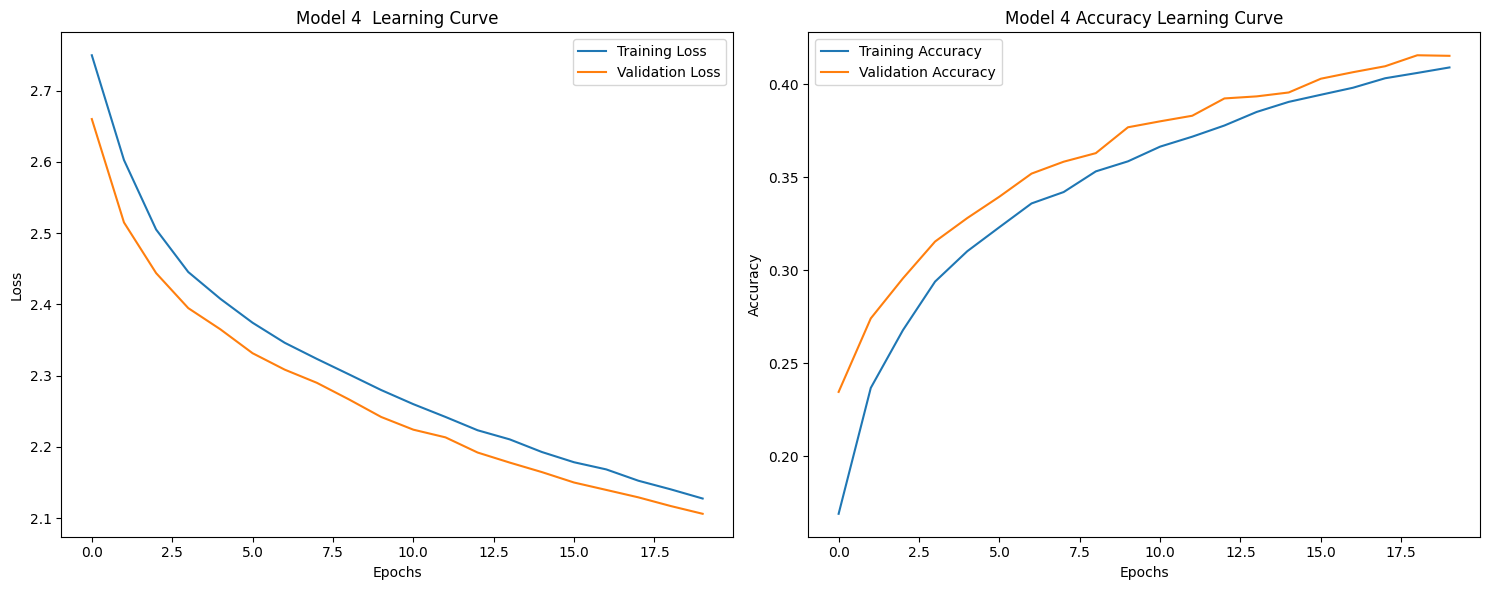

Training Time: 144.76987147331238
Extra Metrics on Validation Set:
	Accuracy: 0.428
	Precision Weighted: 0.4175560197256354
	Recall Weighted: 0.428
	F1-Score Weighted: 0.41732902412828443


In [ ]:
model_plots(history_4,'Model 4')
print('Training Time:',training_time4)
print('Extra Metrics on Validation Set:')
predictions = model_4.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

In [ ]:
opt_3 = SGD(learning_rate=0.001)

model_3 = Sequential([layers.Input((32, 32, 3)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(256, activation='relu'),
                     layers.Dense(256, activation='relu'),
                     layers.Dense(256, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_3.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_3 = model_3.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=20)


# Record end time
end_time = time.time()

# Calculate training time
training_time3 = end_time - start_time

print('Training Time:', training_time3)
print('Extra Metrics on Validation Set:')
predictions = model_3.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

Epoch 1/20
1250/1250 [==============================] - 8s 5ms/step - loss: 2.1594 - accuracy: 0.2155 - val_loss: 2.0527 - val_accuracy: 0.2718
Epoch 2/20
1250/1250 [==============================] - 4s 4ms/step - loss: 1.9877 - accuracy: 0.2988 - val_loss: 1.9415 - val_accuracy: 0.3238
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9052 - accuracy: 0.3307 - val_loss: 1.8827 - val_accuracy: 0.3434
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8570 - accuracy: 0.3448 - val_loss: 1.8404 - val_accuracy: 0.3527
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8234 - accuracy: 0.3567 - val_loss: 1.8080 - val_accuracy: 0.3666
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.7957 - accuracy: 0.3668 - val_loss: 1.7791 - val_accuracy: 0.3772
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7711 - accuracy: 0.3762 - val_loss: 1.7626 - val_accuracy:

In [ ]:
opt_3 = SGD(learning_rate=0.001)

model_3 = Sequential([layers.Input((32, 32, 3)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(32, activation='relu'),
                     layers.Dense(32, activation='relu'),
                     layers.Dense(32, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_3.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_3 = model_3.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=20)


# Record end time
end_time = time.time()

# Calculate training time
training_time3 = end_time - start_time

print('Training Time:', training_time3)
print('Extra Metrics on Validation Set:')
predictions = model_3.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2484 - accuracy: 0.1521 - val_loss: 2.1883 - val_accuracy: 0.1776
Epoch 2/20
1250/1250 [==============================] - 6s 4ms/step - loss: 2.1189 - accuracy: 0.2210 - val_loss: 2.0495 - val_accuracy: 0.2545
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9973 - accuracy: 0.2724 - val_loss: 1.9596 - val_accuracy: 0.2899
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.9304 - accuracy: 0.3004 - val_loss: 1.9091 - val_accuracy: 0.3165
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8932 - accuracy: 0.3179 - val_loss: 1.8796 - val_accuracy: 0.3244
Epoch 6/20
1250/1250 [==============================] - 4s 4ms/step - loss: 1.8668 - accuracy: 0.3299 - val_loss: 1.8557 - val_accuracy: 0.3413
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8445 - accuracy: 0.3389 - val_loss: 1.8331 - val_accuracy:

In [ ]:
opt_3 = SGD(learning_rate=0.001)

model_3 = Sequential([layers.Input((32, 32, 3)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(32, activation='sigmoid'),
                     layers.Dense(32, activation='sigmoid'),
                     layers.Dense(32, activation='sigmoid'),
                     layers.Dense(10, activation='softmax')])

model_3.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_3 = model_3.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=20)


# Record end time
end_time = time.time()

# Calculate training time
training_time3 = end_time - start_time

print('Training Time:', training_time3)
print('Extra Metrics on Validation Set:')
predictions = model_3.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

Epoch 1/20
1250/1250 [==============================] - 6s 4ms/step - loss: 2.4279 - accuracy: 0.1006 - val_loss: 2.3437 - val_accuracy: 0.0982
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3197 - accuracy: 0.1002 - val_loss: 2.3077 - val_accuracy: 0.0980
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3043 - accuracy: 0.0979 - val_loss: 2.3028 - val_accuracy: 0.1051
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3022 - accuracy: 0.1137 - val_loss: 2.3021 - val_accuracy: 0.1318
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3018 - accuracy: 0.1337 - val_loss: 2.3019 - val_accuracy: 0.1153
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3015 - accuracy: 0.1122 - val_loss: 2.3016 - val_accuracy: 0.1337
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 2.3013 - accuracy: 0.1379 - val_loss: 2.3014 - val_accuracy:

Epoch 1/50
1250/1250 [==============================] - 6s 4ms/step - loss: 2.1740 - accuracy: 0.2139 - val_loss: 2.0755 - val_accuracy: 0.2596
Epoch 2/50
1250/1250 [==============================] - 4s 4ms/step - loss: 2.0134 - accuracy: 0.2814 - val_loss: 1.9755 - val_accuracy: 0.2903
Epoch 3/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.9361 - accuracy: 0.3079 - val_loss: 1.9200 - val_accuracy: 0.3118
Epoch 4/50
1250/1250 [==============================] - 4s 4ms/step - loss: 1.8868 - accuracy: 0.3271 - val_loss: 1.8767 - val_accuracy: 0.3347
Epoch 5/50
1250/1250 [==============================] - 4s 4ms/step - loss: 1.8492 - accuracy: 0.3444 - val_loss: 1.8378 - val_accuracy: 0.3524
Epoch 6/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8186 - accuracy: 0.3549 - val_loss: 1.8050 - val_accuracy: 0.3631
Epoch 7/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7919 - accuracy: 0.3648 - val_loss: 1.7796 - val_accuracy:

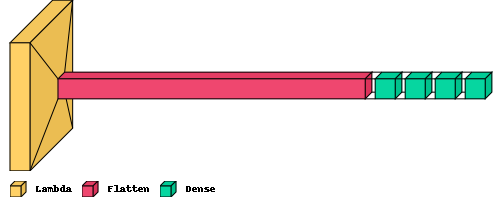

In [ ]:
# Greatly add number of parameters (Model 3)
# Adding more layers and more parameters in each layer

opt_3 = SGD(learning_rate=0.001)

model_3 = Sequential([layers.Input((32, 32, 3)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_3.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_3 = model_3.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=50)


# Record end time
end_time = time.time()

# Calculate training time
training_time3 = end_time - start_time

print(model_3.summary())
visualkeras.layered_view(model_3,legend=True)

In [ ]:
# Greatly add number of parameters (Model 3)
# Adding more layers and more parameters in each layer

opt_3 = SGD(learning_rate=0.1)

model_3 = Sequential([layers.Input((32, 32, 3)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_3.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_3 = model_3.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=50)


# Record end time
end_time = time.time()

# Calculate training time
training_time3 = end_time - start_time


# Calculate training time
training_time3 = end_time - start_time

print('Training Time:', training_time3)
print('Extra Metrics on Validation Set:')
predictions = model_3.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

Epoch 1/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.9660 - accuracy: 0.2813 - val_loss: 1.8394 - val_accuracy: 0.3224
Epoch 2/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.7792 - accuracy: 0.3586 - val_loss: 1.7700 - val_accuracy: 0.3552
Epoch 3/50
1250/1250 [==============================] - 4s 4ms/step - loss: 1.7043 - accuracy: 0.3875 - val_loss: 1.6535 - val_accuracy: 0.4067
Epoch 4/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6490 - accuracy: 0.4063 - val_loss: 1.6083 - val_accuracy: 0.4230
Epoch 5/50
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6107 - accuracy: 0.4209 - val_loss: 1.5910 - val_accuracy: 0.4279
Epoch 6/50
1250/1250 [==============================] - 4s 4ms/step - loss: 1.5817 - accuracy: 0.4288 - val_loss: 1.6018 - val_accuracy: 0.4243
Epoch 7/50
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5571 - accuracy: 0.4363 - val_loss: 1.5610 - val_accuracy:

In [ ]:
# Greatly add number of parameters (Model 3)
# Adding more layers and more parameters in each layer

opt_3 = Adam(learning_rate=0.001)

model_3 = Sequential([layers.Input((32, 32, 3)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(128, activation='relu'),
                     layers.Dense(10, activation='softmax')])

model_3.compile(optimizer=opt_3, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_3 = model_3.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=20)


# Record end time
end_time = time.time()

# Calculate training time
training_time3 = end_time - start_time

# Record end time
end_time = time.time()

print('Training Time:', training_time3)
print('Extra Metrics on Validation Set:')
predictions = model_3.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

Epoch 1/20
1250/1250 [==============================] - 7s 4ms/step - loss: 1.8707 - accuracy: 0.3211 - val_loss: 1.7105 - val_accuracy: 0.3824
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7138 - accuracy: 0.3833 - val_loss: 1.7604 - val_accuracy: 0.3597
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6485 - accuracy: 0.4072 - val_loss: 1.6494 - val_accuracy: 0.4095
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5941 - accuracy: 0.4254 - val_loss: 1.6124 - val_accuracy: 0.4214
Epoch 5/20
1250/1250 [==============================] - 4s 4ms/step - loss: 1.5477 - accuracy: 0.4411 - val_loss: 1.5930 - val_accuracy: 0.4279
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.5265 - accuracy: 0.4530 - val_loss: 1.5438 - val_accuracy: 0.4438
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 1.4958 - accuracy: 0.4629 - val_loss: 1.5202 - val_accuracy:

Epoch 1/20
1250/1250 [==============================] - 7s 5ms/step - loss: 2.8144 - accuracy: 0.1513 - val_loss: 2.7413 - val_accuracy: 0.1790
Epoch 2/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.7027 - accuracy: 0.1898 - val_loss: 2.6311 - val_accuracy: 0.2279
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.6249 - accuracy: 0.2172 - val_loss: 2.5748 - val_accuracy: 0.2560
Epoch 4/20
1250/1250 [==============================] - 8s 6ms/step - loss: 2.5714 - accuracy: 0.2485 - val_loss: 2.5216 - val_accuracy: 0.2862
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.5274 - accuracy: 0.2722 - val_loss: 2.4791 - val_accuracy: 0.3022
Epoch 6/20
1250/1250 [==============================] - 7s 6ms/step - loss: 2.4868 - accuracy: 0.2937 - val_loss: 2.4430 - val_accuracy: 0.3254
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 2.4540 - accuracy: 0.3068 - val_loss: 2.4087 - val_accuracy:

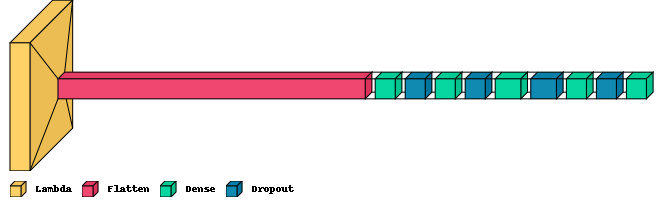

In [ ]:
opt_5 = SGD(learning_rate=0.001)

model_5 = Sequential([layers.Input((32, 32,3)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(64, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(256, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(10, activation='softmax')])

model_5.compile(optimizer=opt_5, loss='categorical_crossentropy', metrics=['accuracy'])

# Record start time
start_time = time.time()

history_5 = model_5.fit(x=X_train, y=y_train, validation_data=(X_valid, y_valid), epochs=20)


# Record end time
end_time = time.time()

# Calculate training time
training_time5 = end_time - start_time

print(model_5.summary())
visualkeras.layered_view(model_5,legend=True)

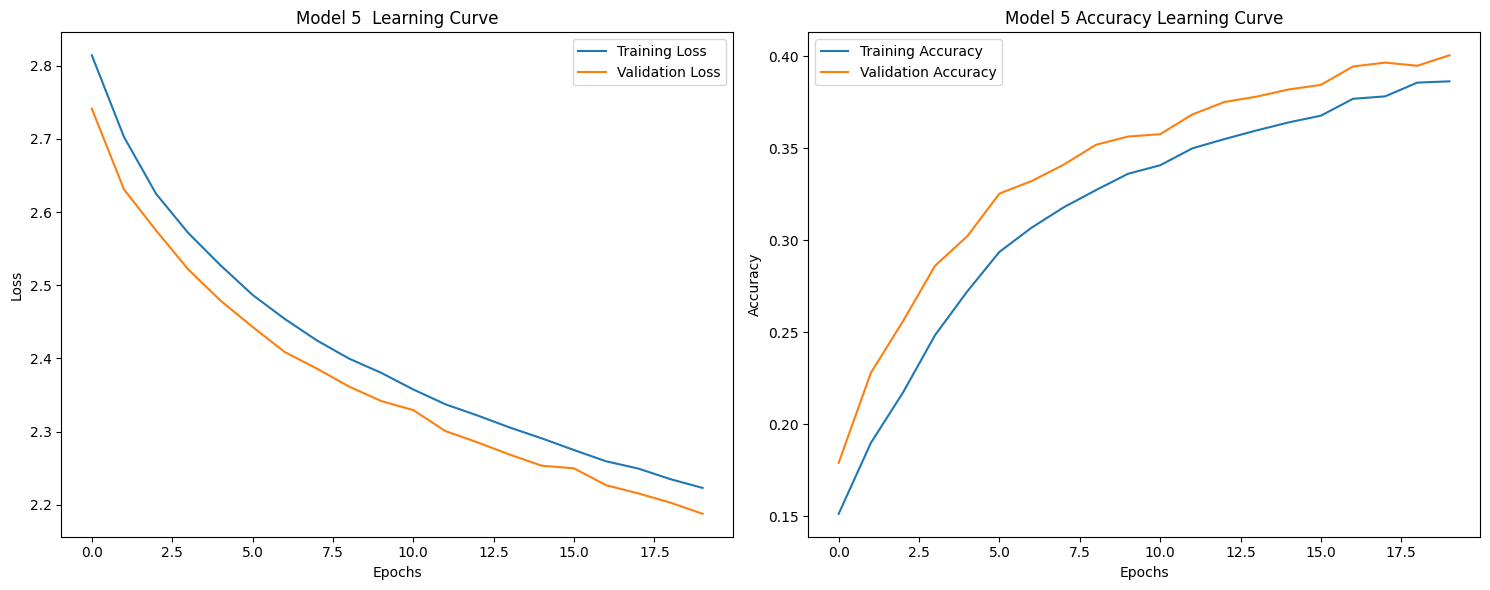

Training Time: 137.8959424495697
Extra Metrics on Validation Set:
	Accuracy: 0.4122
	Precision Weighted: 0.4043108112870374
	Recall Weighted: 0.4122
	F1-Score Weighted: 0.4026824250766932


In [ ]:
model_plots(history_5, 'Model 5')
print('Training Time:', training_time5)
print('Extra Metrics on Validation Set:')
predictions = model_5.predict(X_test,verbose=0)
metrics = evaluate_classification_metrics(y_test,predictions,verbose=True)

In [ ]:
!pip install keras-tuner --upgrade
from kerastuner.tuners import GridSearch, RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 4.0 MB/s eta 0:00:00


<ipython-input-29-c502cfa17020>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import GridSearch, RandomSearch


The previous steps were performed manually for a better understanding at each step. Now, the Tuner Class of Tensorflow.Keras could be used for finding better hyper-parameters.

In [ ]:
# Defining the model-building function for KerasTuner
# this function will be used to the creation of the models with different hyperparameters

def build_model(hp):
    model = Sequential()

    # Entry Flatten and Dense Layer
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    model.add(layers.Lambda(lambda x: x / 255))
    model.add(layers.Dense(10, activation='softmax'))

    # Set the learning rate based on the hyperparameter
    learning_rate = hp.Choice("learning_rate", values=[0.0001,0.001,0.01,0.1,1.0])

    # Compile the model
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the tuner
tuner = GridSearch(
    build_model,
    objective='val_accuracy',
    overwrite=True
)


# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid y_valid))

best_hp = tuner.get_best_hyperparameters(1)[0].values
print("Best Hyperparameters:", best_hp)

# Build the model with the best hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
print(best_model.summary())

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0001 summary
Hyperparameters:
learning_rate: 0.001
Score: 0.38040000200271606

Trial 0002 summary
Hyperparameters:
learning_rate: 0.01
Score: 0.3781000077724457

Trial 0000 summary
Hyperparameters:
learning_rate: 0.0001
Score: 0.3098999857902527

Trial 0004 summary
Hyperparameters:
learning_rate: 1.0
Score: 0.2802000045776367

Trial 0003 summary
Hyperparameters:
learning_rate: 0.1
Score: 0.2736000120639801


As the final step in this collab, a grid search will be performed to find a decent Fully-Connected Neural Network for our Classification Problem.
In another collab, more complex Neural Networks are going to be trained in order to achieve higher accuracy. CNN architectures will be exploited.

In [ ]:
# Define the model-building function for KerasTuner
def build_model(hp):
    model = Sequential()

    # Entry Flatten and Dense Layer
    model.add(layers.Flatten(input_shape=(32, 32, 3)))
    model.add(layers.Lambda(lambda x: x / 255))

    # Number of layers
    num_layers = hp.Int('num_layers', min_value=1, max_value=5, step=1)

    # Architecture with different number of layers
    for _ in range(num_layers):
        # Add a Dense layer
        model.add(layers.Dense(units=hp.Int('units1', min_value=32, max_value=256, step=32),
                        activation=hp.Choice('activation1', values = ['relu','sigmoid'])))

        # Add Dropout layer with probability
        if hp.Boolean('use_dropout', default=False):
            model.add(layers.Dropout(rate=hp.Float('dropout_rate', min_value=0.0, max_value=0.5)))

        # Add Regularization
        if hp.Boolean('use_regularization', default=False):
            reg_type = hp.Choice('reg_type', values=['L1', 'L2'])
            reg_strength = hp.Float('reg_strength', min_value=1e-5, max_value=1e-2, sampling='log')

            if reg_type == 'l1':
                model.add(layers.Dense(units=hp.Int('units2', min_value=32, max_value=256, step=32),
                                activation=hp.Choice('activation2', values = ['relu','sigmoid']), kernel_regularizer=L1(reg_strength)))
            else:
                model.add(layers.Dense(units=hp.Int('units3', min_value=32, max_value=256, step=32),
                                activation=hp.Choice('activation3', values = ['relu','sigmoid']), kernel_regularizer=L2(reg_strength)))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    optimizer = SGD(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

In [ ]:
# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=15,  # Number of hyperparameter combinations to try
    directory='random_tuner_results',
    project_name='cnn_tuning',
    overwrite = True
)

# Perform the hyperparameter search
tuner.search(X_train, y_train,epochs = 30,validation_data=(X_valid, y_valid),use_multiprocessing=True,callbacks=[keras.callbacks.EarlyStopping('val_loss', patience=3)])
# should also perform tuning on epochs

# Check the best hyperparameters
best_hp = tuner.get_best_hyperparameters(1)[0].values
print("Best Hyperparameters:", best_hp)

# Build the model with the best hyperparameters
best_model_random_search = tuner.get_best_models(num_models=1)[0]
print(best_model_random_search.summary())

Trial 15 Complete [00h 05m 24s]
val_accuracy: 0.26499998569488525

Best val_accuracy So Far: 0.5085999965667725
Total elapsed time: 00h 53m 53s
Best Hyperparameters: {'num_layers': 1, 'units1': 160, 'activation1': 'relu', 'use_dropout': True, 'use_regularization': False, 'learning_rate': 0.00641215041231751, 'reg_type': 'L1', 'reg_strength': 4.9906754359539955e-05, 'units3': 64, 'activation3': 'relu', 'dropout_rate': 0.17448593022764308}
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 lambda (Lambda)             (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 160)               491680    
                                                                 
 dropout (

In [ ]:
# Perform the grid search
tuner = GridSearch(build_model,
                   objective='val_accuracy',
                   max_trials=50,
                   overwrite = True)

tuner.search(X_train, y_train,epochs=10,validation_data=(X_valid, y_valid),callbacks=[keras.callbacks.EarlyStopping('val_loss', patience=3)])

# Get the best hyperparameters
best_hp = tuner.oracle.get_best_trials(num_trials=1)[0].hyperparameters.values
print("Best Hyperparameters:", best_hp)

Trial 50 Complete [00h 01m 24s]
val_accuracy: 0.15240000188350677

Best val_accuracy So Far: 0.43549999594688416
Total elapsed time: 01h 02m 06s
Best Hyperparameters: {'num_layers': 1, 'units1': 32, 'activation1': 'relu', 'use_dropout': False, 'use_regularization': False, 'learning_rate': 0.007079457843841382}


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 lambda (Lambda)             (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 160)               491680    
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1610      
                                                                 
Total params: 493290 (1.88 MB)
Trainable params: 493290 (1.88 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


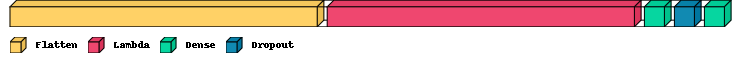

In [ ]:
print(best_model_random_search.summary())
visualkeras.layered_view(best_model_random_search,legend=True)

In [ ]:
# Random Search was able to provide a better model after multiple runs since the limit of 50 models in the Grid Search was not big enough
y_pred = best_model_random_search.predict(X_test,verbose=0)
# Transform the labels to Label Encoding
metrics = evaluate_classification_metrics(y_test, y_pred,verbose=True)
metrics

	Accuracy: 0.5069
	Precision Weighted: 0.5059815929147409
	Recall Weighted: 0.5069
	F1-Score Weighted: 0.4988374281387289


{'Accuracy': 0.5069,
 'Precision': 0.5059815929147409,
 'Recall': 0.5069,
 'F1 Score': 0.4988374281387289,
 'Confusion Matrix': array([[568,  43,  44,  18,  44,  18,  40,  61, 106,  58],
        [ 27, 659,  10,  12,  12,  19,  22,  35,  49, 155],
        [ 79,  30, 245,  78, 192,  77, 169,  95,  15,  20],
        [ 28,  25,  48, 319,  55, 171, 183, 102,  18,  51],
        [ 42,  15,  68,  51, 451,  40, 179, 125,  16,  13],
        [ 15,  18,  57, 192,  79, 359, 116, 119,  18,  27],
        [  7,  21,  31,  52, 111,  33, 680,  31,  10,  24],
        [ 24,  20,  21,  61,  76,  56,  37, 652,   5,  48],
        [122,  85,  12,  27,  30,  27,  22,  26, 578,  71],
        [ 34, 209,   9,  23,  11,  15,  30,  71,  40, 558]]),
 'Classification Report': '              precision    recall  f1-score   support\n\n           0       0.60      0.57      0.58      1000\n           1       0.59      0.66      0.62      1000\n           2       0.45      0.24      0.32      1000\n           3       0.3

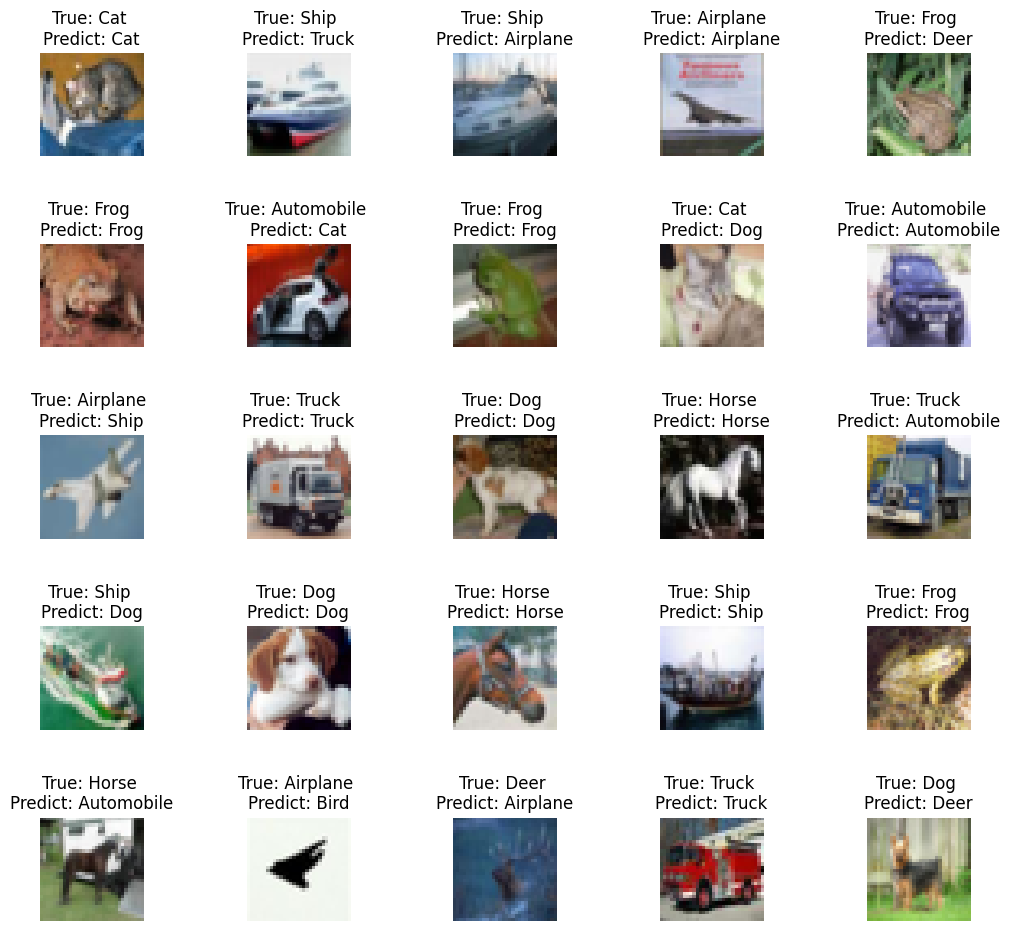

In [ ]:
# Visualize the outputs in the validation set, checking some examples of right and wrong classification
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

predictions = best_model_random_search.predict(X_test,verbose=0)
y_pred = np.argmax(predictions,axis=1)
y_test = np.argmax(y_test,axis=1)
fig, axes = plt.subplots(5, 5, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(25):
    axes[i].imshow(X_test[i])
    axes[i].set_title('True: %s \nPredict: %s' % (labels[y_test[i]], labels[y_pred[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)